<a href="https://colab.research.google.com/github/eyaguirat10/CoWin-Breast-Cancer-Detection/blob/samar/MiniProjet_ML2Partie2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **I. Business Understanding**



**DSO2 (Data Science Objective):**
 Cluster diagnosis patterns (types of cancers):




# **II. Data Understanding**

## **Importing librairies**

Importing libraries is essential because it provides access to pre-existing functions, methods, and tools, making data analysis easier.

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## **II.1. Data Loading**

This allows us to access the raw data and begin exploring its structure, missing values, and data types.

In [210]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [211]:
import os

file_path = "/content/drive/MyDrive/Dataset_ML/dataR2.csv"

# Check if the file exists before trying to read it
if os.path.exists(file_path):
    try:
        # Try reading with utf-8 first (default)
        df = pd.read_csv(file_path)
        print(f"Successfully loaded CSV with utf-8: {df.shape[0]} rows, {df.shape[1]} columns")
    except UnicodeDecodeError:
        try:
            # If utf-8 fails, try latin-1
            df = pd.read_csv(file_path, encoding='latin-1')
            print(f"Successfully loaded CSV with latin-1: {df.shape[0]} rows, {df.shape[1]} columns")
        except Exception as e:
            print(f"Error loading CSV with latin-1: {e}")
            df = None # Ensure df is None if loading fails
    except Exception as e:
        print(f"An unexpected error occurred while loading CSV: {e}")
        df = None # Ensure df is None if loading fails
else:
    print(f"Error: The file was not found at {file_path}")
    df = None # Ensure df is None if file is not found

if df is not None:
    # Display the first few rows if the dataframe was loaded successfully
    display(df.head())

Successfully loaded CSV with utf-8: 116 rows, 10 columns


,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [212]:
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [213]:
df.tail()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
111,45,26.85,92,3.33,0.755688,54.68,12.10,10.96,268.23,2
112,62,26.84,100,4.53,1.117400,12.45,21.42,7.32,330.16,2
113,65,32.05,97,5.73,1.370998,61.48,22.54,10.33,314.05,2
114,72,25.59,82,2.82,0.570392,24.96,33.75,3.27,392.46,2
115,86,27.18,138,19.91,6.777364,90.28,14.11,4.35,90.09,2


In [214]:
df.dtypes

,0
Age,int64
BMI,float64
Glucose,int64
Insulin,float64
HOMA,float64
Leptin,float64
Adiponectin,float64
Resistin,float64
MCP.1,float64
Classification,int64


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [216]:
df.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


## **II.3. Missing Values Analysis**

In this step, we calculate how many missing (null) values exist in each column of the dataset. This information is important because columns with many missing values may need special handling, such as imputation or removal, to ensure the quality of our analysis and models.

In [217]:
info_df = pd.DataFrame({
        'Column': df.columns,
        'Non_Null_Count': df.count(),
        'Null_Count': df.isnull().sum(),
        'Missing_%': (df.isnull().sum() / len(df) * 100).round(2)
    })
print(info_df.to_string(index=False))


        Column  Non_Null_Count  Null_Count  Missing_%
           Age             116           0        0.0
           BMI             116           0        0.0
       Glucose             116           0        0.0
       Insulin             116           0        0.0
          HOMA             116           0        0.0
        Leptin             116           0        0.0
   Adiponectin             116           0        0.0
      Resistin             116           0        0.0
         MCP.1             116           0        0.0
Classification             116           0        0.0


## **II.5. Duplicate Analysis**

In this step, we check the dataset for duplicate rows. Duplicate records can skew analysis and models by overrepresenting certain data points.

In [218]:
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")
if duplicate_count > 0:
    print(f"Percentage: {(duplicate_count/len(df)*100):.2f}%")
print()


Number of duplicate rows: 0



## **II.6. Data Visualization**

Boxplots are used to visualize the distribution of numerical data and detect outliers. They display the median, quartiles, and potential extreme values for each feature, helping us understand variability and spot anomalies that may need further investigation or treatment.

#### Create boxplots for numerical columns

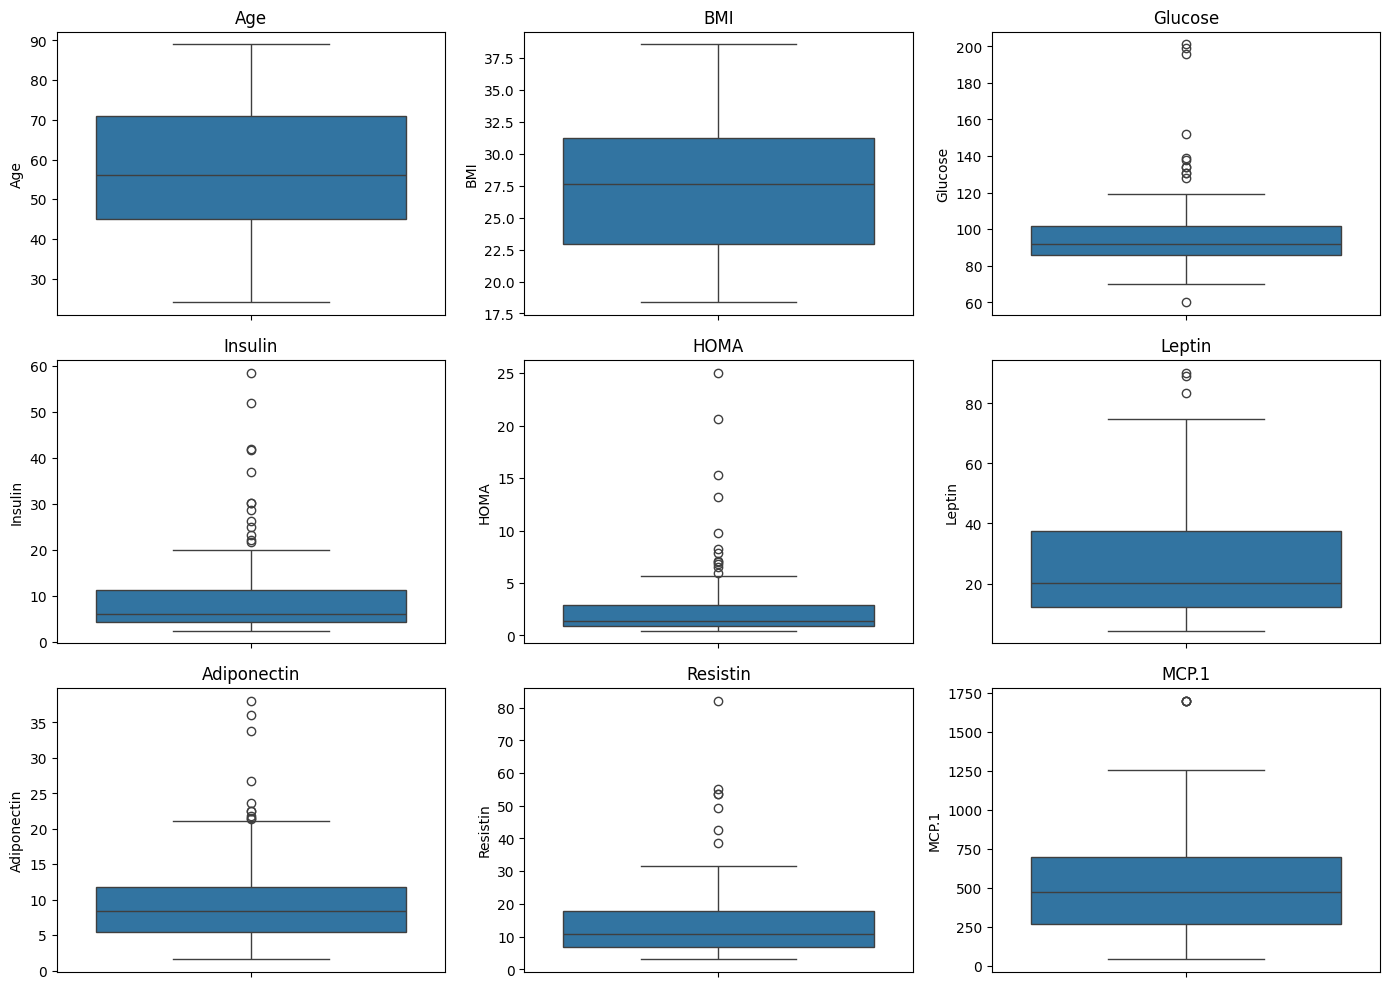

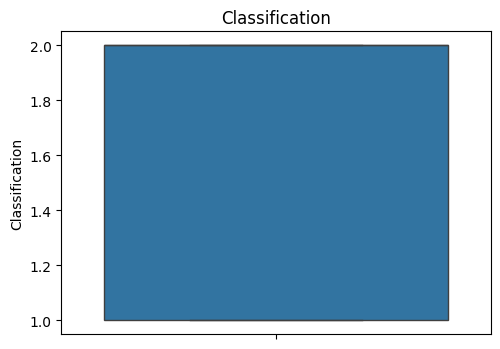

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

numerical_cols = [col for col in numerical_cols if df[col].dropna().shape[0] > 0]
cols_per_fig = 9  # number of boxplots per figure

for start in range(0, len(numerical_cols), cols_per_fig):
    end = start + cols_per_fig
    batch = numerical_cols[start:end]

    plt.figure(figsize=(14, 10))
    for i, col in enumerate(batch, 1):
        plt.subplot(3, 3, i)  # 2 rows, 3 columns
        sns.boxplot(y=df[col])
        plt.title(col)

    plt.tight_layout()
    plt.show()


Ce dataset a été construit pour la recherche → les outliers ne sont pas des erreurs, ce sont des annomalies reliés à la maladie


Correlation Visualization:

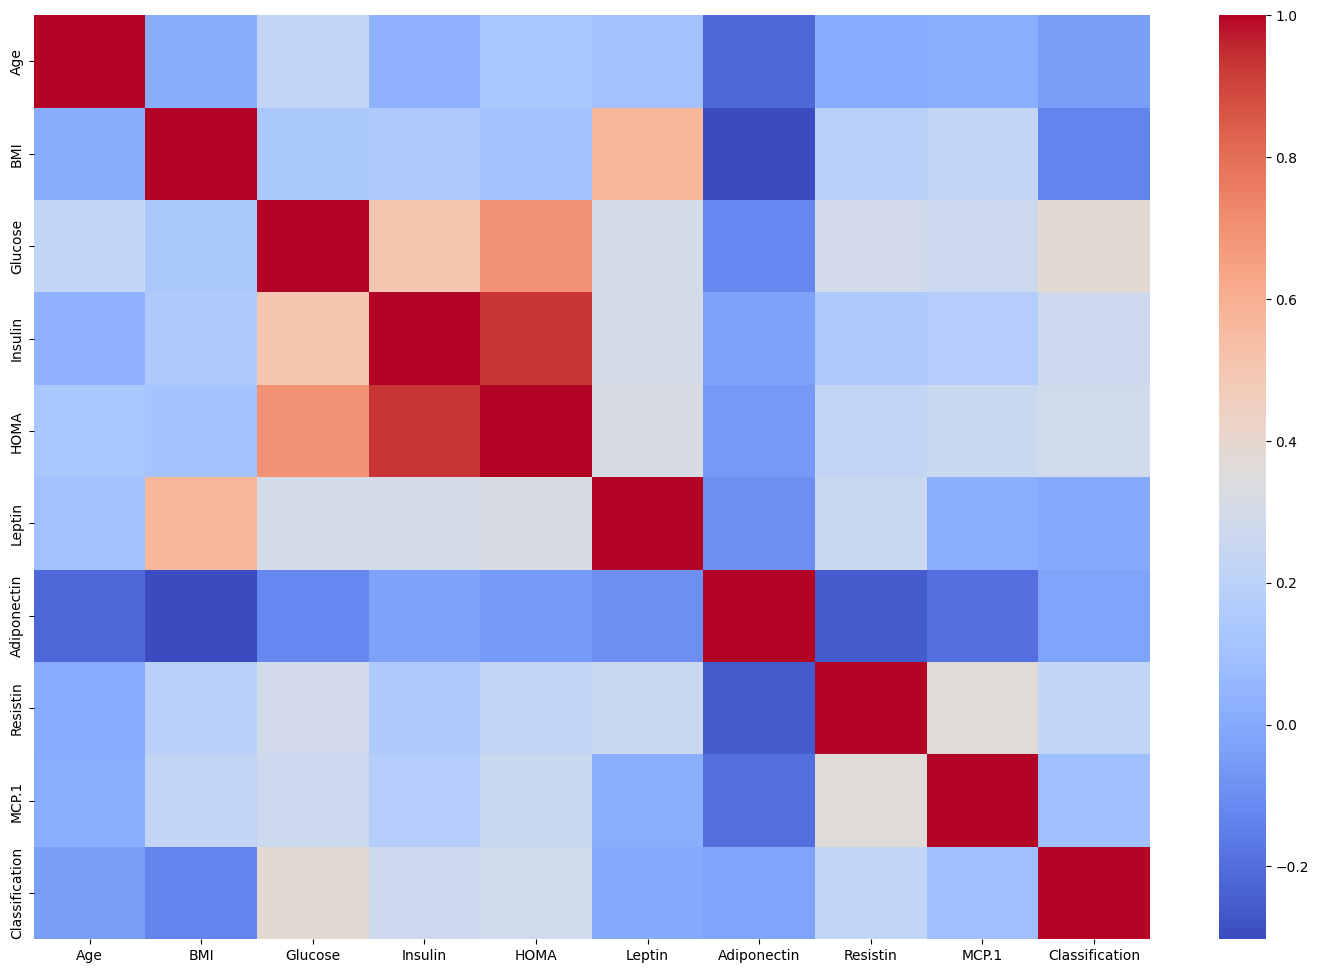

In [220]:
# matrice de correllation les variables entre eux
df_features = df.drop(columns=['Classification'])
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.show()


In [221]:
# matrice de correllation les variables avec la target
# creation de diagnosis numerique

df.corr()['Classification'].sort_values(ascending=False)



,Classification
Classification,1.000000
Glucose,0.384315
HOMA,0.284012
Insulin,0.276804
Resistin,0.227310
MCP.1,0.091381
Leptin,-0.001078
Adiponectin,-0.019490
Age,-0.043555
BMI,-0.132586


### Principal Component Analysis (PCA)

In [222]:
# standardisation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Sélectionner uniquement les variables numériques
X = df.select_dtypes(include=[np.number])

# --- 2. Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 3. PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Variance expliquée
print("Variance expliquée par PC1 et PC2 :", pca.explained_variance_ratio_)


Variance expliquée par PC1 et PC2 : [0.3169621  0.16237842]


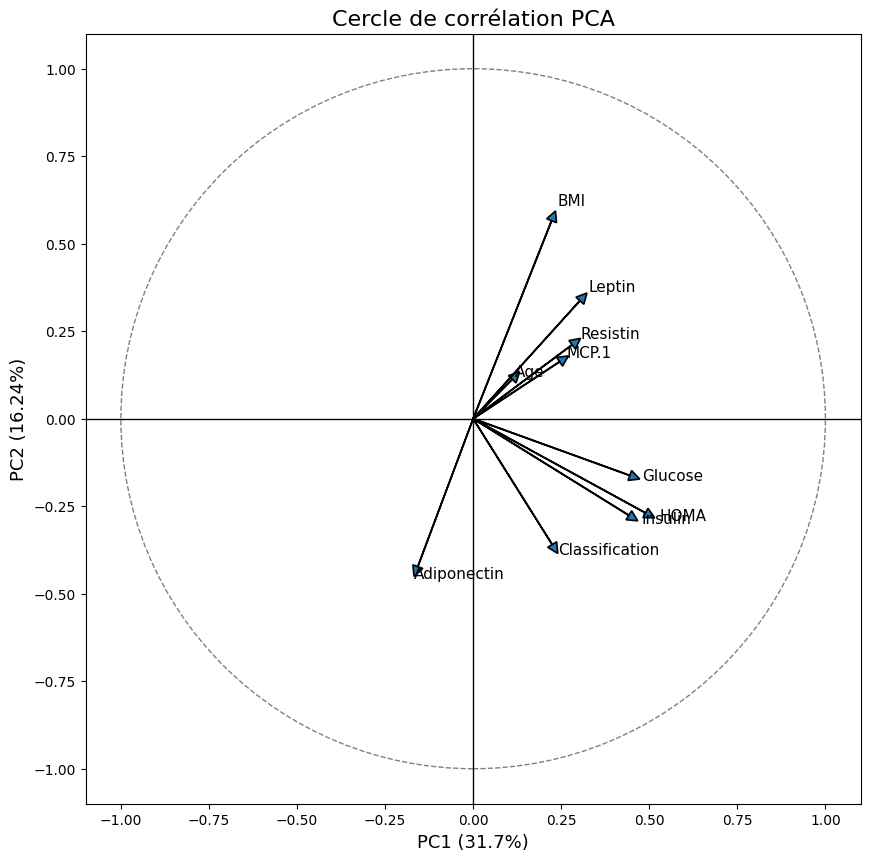

In [223]:
# ---  cercle de corrélation ---
def plot_correlation_circle(pca, features, dim1=1, dim2=2):
    pcs = pca.components_
    pc1 = pcs[dim1-1]
    pc2 = pcs[dim2-1]

    fig, ax = plt.subplots(figsize=(10,10))

    # Cercle
    circle = plt.Circle((0,0), 1, color='grey', fill=False, linestyle='--')
    ax.add_artist(circle)

    # Axes
    ax.axhline(0, color='black', lw=1)
    ax.axvline(0, color='black', lw=1)

    # Variables
    for i, feature in enumerate(features):
        x = pc1[i]
        y = pc2[i]
        ax.arrow(0, 0, x, y, head_width=0.03, head_length=0.03, linewidth=1.2)
        ax.text(x*1.08, y*1.08, feature, fontsize=11)

    ax.set_xlabel(f"PC{dim1} ({round(pca.explained_variance_ratio_[dim1-1]*100,2)}%)", fontsize=13)
    ax.set_ylabel(f"PC{dim2} ({round(pca.explained_variance_ratio_[dim2-1]*100,2)}%)", fontsize=13)
    ax.set_title("Cercle de corrélation PCA", fontsize=16)
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    plt.grid(False)
    plt.show()

# --- Appel de la fonction ---
plot_correlation_circle(pca, X.columns)


# **III. Data Preparation**






## III.1. Data Transformation


In [224]:
features = [col for col in df.columns if col != "Classification"]
X = df[features].values
y = df["Classification"].values


In [225]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# **IV. Modeling**

In [226]:
# 1) Garder seulement les malades
df_cancer = df[df["Classification"] == 2].copy() #df contenant les malades seulement
df_non_cancer = df[df["Classification"] == 1].copy() #df contenant les non malades seulement
print(df_cancer.shape)  # nombre de patientes malades

(64, 10)


## **Modéle 1 (K-means)**

In [227]:


# 2) Features = toutes les colonnes explicatives SANS Classification
features = [col for col in df_cancer.columns if col != "Classification"]
X_cancer = df_cancer[features].values


In [228]:
from sklearn.preprocessing import StandardScaler

scaler_cancer = StandardScaler()
X_cancer_scaled = scaler_cancer.fit_transform(X_cancer)


K=2: silhouette=0.231
K=3: silhouette=0.219
K=4: silhouette=0.209


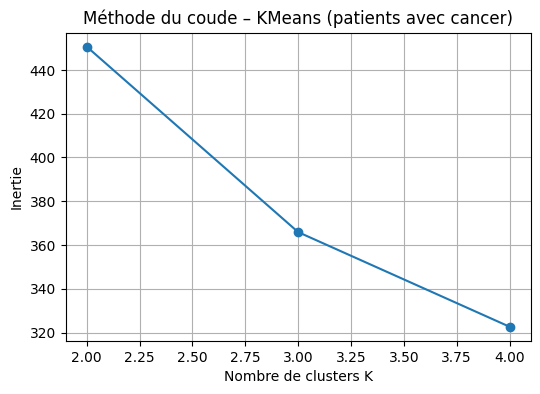

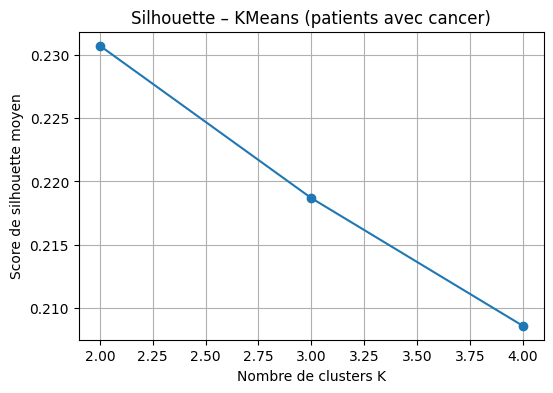

In [229]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertias = []
sil_scores = []
K_range = range(2, 5)  # K = 2, 3, 4 pour les sous-types de cancer

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_cancer_scaled)
    inertias.append(km.inertia_)
    labels = km.labels_
    sil = silhouette_score(X_cancer_scaled, labels)
    sil_scores.append(sil)
    print(f"K={k}: silhouette={sil:.3f}")

# Coude
plt.figure(figsize=(6,4))
plt.plot(K_range, inertias, marker='o')
plt.xlabel("Nombre de clusters K")
plt.ylabel("Inertie")
plt.title("Méthode du coude – KMeans (patients avec cancer)")
plt.grid(True)
plt.show()

# Silhouette
plt.figure(figsize=(6,4))
plt.plot(K_range, sil_scores, marker='o')
plt.xlabel("Nombre de clusters K")
plt.ylabel("Score de silhouette moyen")
plt.title("Silhouette – KMeans (patients avec cancer)")
plt.grid(True)
plt.show()


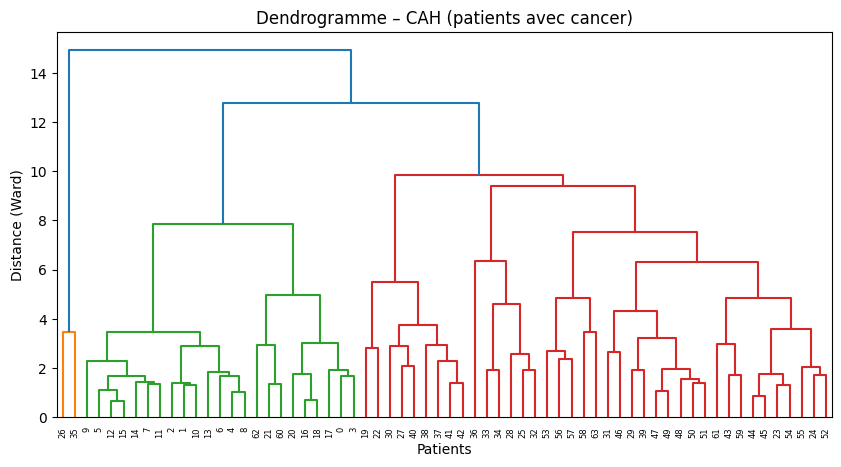

In [230]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Lien hiérarchique avec critère de Ward (adapté aux données continues standardisées)
Z = linkage(X_cancer_scaled, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode=None, color_threshold=None)
plt.title("Dendrogramme – CAH (patients avec cancer)")
plt.xlabel("Patients")
plt.ylabel("Distance (Ward)")
plt.show()


 Pour k=2

In [231]:
best_k = 2

kmeans_cancer = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans_cancer.fit(X_cancer_scaled)

cluster_labels_cancer = kmeans_cancer.labels_

# Ajouter les labels de cluster dans df_cancer
df_cancer["cluster_kmeans_cancer"] = cluster_labels_cancer

# Si tu veux réintégrer dans le df complet (NaN pour les non malades)
df["cluster_kmeans_cancer"] = np.nan
df.loc[df_cancer.index, "cluster_kmeans_cancer"] = cluster_labels_cancer


In [232]:
# Moyenne des variables par cluster
cluster_profile = df_cancer.groupby("cluster_kmeans_cancer")[features].mean()
print(cluster_profile)

# Nombre de patientes par cluster
print(df_cancer["cluster_kmeans_cancer"].value_counts())


                             Age        BMI  Glucose    Insulin      HOMA  \
cluster_kmeans_cancer                                                       
0                      52.975000  24.661490   94.875   7.094225  1.668641   
1                      62.833333  30.856824  123.375  21.544875  6.881176   

                          Leptin  Adiponectin   Resistin      MCP.1  
cluster_kmeans_cancer                                                
0                      16.935700    10.423703  16.408309  494.80115  
1                      42.697867     9.456941  18.662891  676.70875  
cluster_kmeans_cancer
0    40
1    24
Name: count, dtype: int64


In [233]:
from sklearn.decomposition import PCA

# Projection PCA 2D pour les patientes avec cancer
pca_vis = PCA(n_components=2)
X_cancer_pca = pca_vis.fit_transform(X_cancer_scaled)

# IMPORTANT : ajouter les colonnes dans df_cancer
df_cancer = df_cancer.copy()
df_cancer["PC1"] = X_cancer_pca[:, 0]
df_cancer["PC2"] = X_cancer_pca[:, 1]


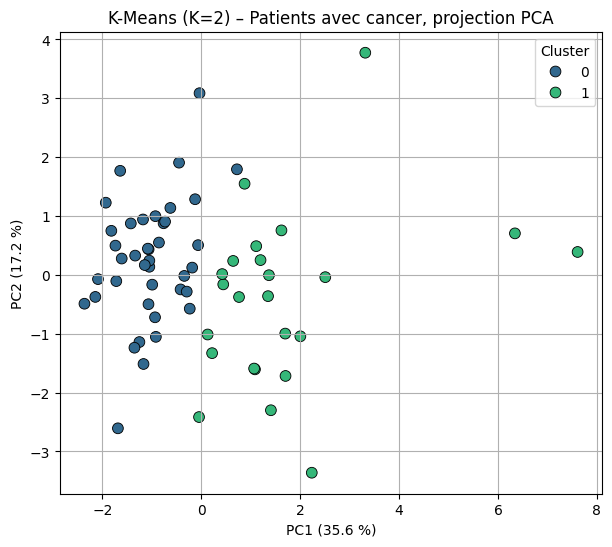

In [234]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 6))
sns.scatterplot(
    data=df_cancer,
    x="PC1", y="PC2",
    hue="cluster_kmeans_cancer",
    palette="viridis",
    s=60,
    edgecolor="k"
)
plt.xlabel(f"PC1 ({pca_vis.explained_variance_ratio_[0]*100:.1f} %)")
plt.ylabel(f"PC2 ({pca_vis.explained_variance_ratio_[1]*100:.1f} %)")
plt.title("K-Means (K=2) – Patients avec cancer, projection PCA")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


Cluster 0:

Âge plus jeune, IMC plus bas, glucose, insuline et HOMA nettement inférieurs à ceux du cluster 1 → profil métabolique moins perturbé.​

Leptine, résistine et MCP.1 aussi plus faibles, ce qui va dans le sens d’une obésité/inflammation plus modérée.​

Un nom cohérent :
« Cancers à risque métabolique modéré » ou « Sous-type métabolique modéré ».


Cluster 1:

Âge moyen plus élevé (~63 ans vs ~53), IMC nettement plus haut (~31), glucose très élevé (~123), insuline et HOMA multipliés par 3–4 → forte résistance à l’insuline / syndrome métabolique.​

Leptine et MCP.1 beaucoup plus élevées, résistine plus haute également → profil d’obésité marquée et d’inflammation systémique plus importante.​

Un nom cohérent :
« Cancers à haut risque métabolique (obésité et résistance à l’insuline) » ou plus court « Sous‑type métabolique sévère ».

 Pour k=3

In [235]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# On part de df_cancer, features, X_cancer_scaled déjà définis
best_k = 3

kmeans_cancer_3 = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans_cancer_3.fit(X_cancer_scaled)

cluster_labels_cancer_3 = kmeans_cancer_3.labels_
df_cancer["cluster_kmeans_cancer_3"] = cluster_labels_cancer_3

# Qualité interne
sil_3 = silhouette_score(X_cancer_scaled, cluster_labels_cancer_3)
print("Silhouette K=3 (cancers) :", sil_3)


Silhouette K=3 (cancers) : 0.21868320395349716


In [236]:
df_cancer.head(50)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,cluster_kmeans_cancer,PC1,PC2,cluster_kmeans_cancer_3
52,45,21.303949,102,13.852,3.485163,7.6476,21.056625,23.03408,552.444,2,0,-1.050763,0.137829,0
53,45,20.829995,74,4.560,0.832352,7.7529,8.237405,28.03230,382.955,2,0,-1.931268,1.226793,0
54,49,20.956608,94,12.305,2.853119,11.2406,8.412175,23.11770,573.630,2,0,-0.927665,0.997197,0
55,34,24.242424,92,21.699,4.924226,16.7353,21.823745,12.06534,481.949,2,0,-0.935356,-0.720615,0
56,42,21.359915,93,2.999,0.687971,19.0826,8.462915,17.37615,321.919,2,0,-1.735671,0.496970,0
57,68,21.082813,102,6.200,1.559920,9.6994,8.574655,13.74244,448.799,2,0,-1.050433,0.241925,0
58,51,19.132653,93,4.364,1.001102,11.0816,5.807620,5.57055,90.600,2,0,-2.088691,-0.071911,0
59,62,22.656250,92,3.482,0.790182,9.8648,11.236235,10.69548,703.973,2,0,-1.337004,0.327515,0
60,38,22.499637,95,5.261,1.232828,8.4380,4.771920,15.73606,199.055,2,0,-1.819040,0.748879,0
61,69,21.513859,112,6.683,1.846290,32.5800,4.138025,15.69876,713.239,2,0,-0.064542,0.505418,0


In [237]:
df_cancer.tail()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,cluster_kmeans_cancer,PC1,PC2,cluster_kmeans_cancer_3
111,45,26.85,92,3.33,0.755688,54.68,12.10,10.96,268.23,2,0,-0.918649,-1.053066,0
112,62,26.84,100,4.53,1.117400,12.45,21.42,7.32,330.16,2,0,-1.351784,-1.237602,0
113,65,32.05,97,5.73,1.370998,61.48,22.54,10.33,314.05,2,1,-0.045444,-2.415937,1
114,72,25.59,82,2.82,0.570392,24.96,33.75,3.27,392.46,2,0,-1.685919,-2.607044,0
115,86,27.18,138,19.91,6.777364,90.28,14.11,4.35,90.09,2,1,2.234369,-3.361737,1


In [238]:
# Nombre de patientes par cluster
print(df_cancer["cluster_kmeans_cancer_3"].value_counts())

# Moyenne des variables par cluster
cluster_profile_3 = df_cancer.groupby("cluster_kmeans_cancer_3")[features].mean()
print(cluster_profile_3)


cluster_kmeans_cancer_3
0    39
1    22
2     3
Name: count, dtype: int64
                               Age        BMI     Glucose    Insulin  \
cluster_kmeans_cancer_3                                                
0                        53.076923  24.530303   95.512821   7.060846   
1                        60.818182  31.124368  110.681818  19.085727   
2                        73.000000  28.535148  198.666667  35.195667   

                              HOMA     Leptin  Adiponectin   Resistin  \
cluster_kmeans_cancer_3                                                 
0                         1.674255  16.053572    10.415805  16.296522   
1                         5.224861  42.701214    10.015245  15.248236   
2                        17.216999  45.553600     5.787642  44.405400   

                               MCP.1  
cluster_kmeans_cancer_3               
0                         492.040000  
1                         562.193500  
2                        1491.746333  


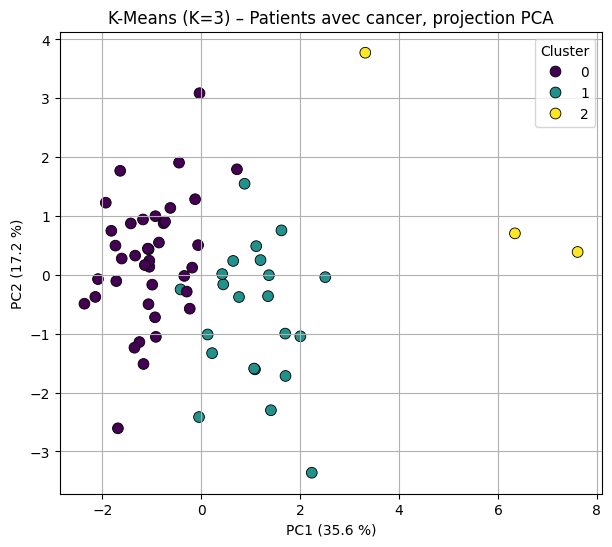

In [239]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

pca_vis_3 = PCA(n_components=2)
X_cancer_pca_3 = pca_vis_3.fit_transform(X_cancer_scaled)

df_cancer["PC1_3"] = X_cancer_pca_3[:, 0]
df_cancer["PC2_3"] = X_cancer_pca_3[:, 1]

plt.figure(figsize=(7, 6))
sns.scatterplot(
    data=df_cancer,
    x="PC1_3", y="PC2_3",
    hue="cluster_kmeans_cancer_3",
    palette="viridis",
    s=60,
    edgecolor="k"
)
plt.xlabel(f"PC1 ({pca_vis_3.explained_variance_ratio_[0]*100:.1f} %)")
plt.ylabel(f"PC2 ({pca_vis_3.explained_variance_ratio_[1]*100:.1f} %)")
plt.title("K-Means (K=3) – Patients avec cancer, projection PCA")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


**En regardant la figure :**

Le cluster 0 (violet) est surtout à gauche, avec des valeurs PC1 plus faibles → cancers avec profil métabolique relativement moins perturbé, plus proches de la « normalité » sur glucose/insuline/HOMA.​

Le cluster 1 (vert) occupe la zone centrale/droite, avec PC1 plus élevé que le cluster 0 → cancers avec anomalies métaboliques intermédiaires (glucose/HOMA plus élevés), mais pas aussi extrêmes que le cluster 2.​

Le cluster 2 (jaune) regroupe quelques patientes très à droite en PC1 → cas les plus extrêmes sur l’axe métabolique (très forte hyperglycémie et/ou résistance à l’insuline, probablement aussi BMI/Leptin élevés).

**Cluster 0 : “Cancers métaboliques modérés”**

Profil métabolique le moins perturbé parmi les malades.

**Cluster 1 : “Cancers à risque métabolique intermédiaire”**

Anomalies métaboliques nettes mais pas extrêmes, groupe central.

**Cluster 2 : “Cancers métaboliques sévères (profils extrêmes)”**

Quelques patientes avec dérèglements très marqués, situées à l’extrémité de PC1.

## **Modéle 2 (Agglomerative)**

In [240]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Modèle CAH avec k = 3
agg_cancer_3 = AgglomerativeClustering(
    n_clusters=3,
    linkage="ward"       # euclidean + Ward
)

labels_agg_3 = agg_cancer_3.fit_predict(X_cancer_scaled)

# Ajouter les labels dans df_cancer
df_cancer["cluster_agg_3"] = labels_agg_3

# (optionnel) remettre dans le df complet
df["cluster_agg_3"] = np.nan
df.loc[df_cancer.index, "cluster_agg_3"] = labels_agg_3

# Silhouette pour évaluer la qualité (facultatif mais utile pour comparaison avec KMeans)
sil_agg_3 = silhouette_score(X_cancer_scaled, labels_agg_3)
print("Silhouette CAH k= :", sil_agg_3)


Silhouette CAH k= : 0.16333552353660807


In [241]:
df_cancer.head(50)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,cluster_kmeans_cancer,PC1,PC2,cluster_kmeans_cancer_3,PC1_3,PC2_3,cluster_agg_3
52,45,21.303949,102,13.852,3.485163,7.6476,21.056625,23.03408,552.444,2,0,-1.050763,0.137829,0,-1.050763,0.137829,2
53,45,20.829995,74,4.560,0.832352,7.7529,8.237405,28.03230,382.955,2,0,-1.931268,1.226793,0,-1.931268,1.226793,2
54,49,20.956608,94,12.305,2.853119,11.2406,8.412175,23.11770,573.630,2,0,-0.927665,0.997197,0,-0.927665,0.997197,2
55,34,24.242424,92,21.699,4.924226,16.7353,21.823745,12.06534,481.949,2,0,-0.935356,-0.720615,0,-0.935356,-0.720615,2
56,42,21.359915,93,2.999,0.687971,19.0826,8.462915,17.37615,321.919,2,0,-1.735671,0.496970,0,-1.735671,0.496970,2
57,68,21.082813,102,6.200,1.559920,9.6994,8.574655,13.74244,448.799,2,0,-1.050433,0.241925,0,-1.050433,0.241925,2
58,51,19.132653,93,4.364,1.001102,11.0816,5.807620,5.57055,90.600,2,0,-2.088691,-0.071911,0,-2.088691,-0.071911,2
59,62,22.656250,92,3.482,0.790182,9.8648,11.236235,10.69548,703.973,2,0,-1.337004,0.327515,0,-1.337004,0.327515,2
60,38,22.499637,95,5.261,1.232828,8.4380,4.771920,15.73606,199.055,2,0,-1.819040,0.748879,0,-1.819040,0.748879,2
61,69,21.513859,112,6.683,1.846290,32.5800,4.138025,15.69876,713.239,2,0,-0.064542,0.505418,0,-0.064542,0.505418,2


In [242]:
cluster_profile_agg_3 = df_cancer.groupby("cluster_agg_3")[features].mean()
print(cluster_profile_agg_3)

print(df_cancer["cluster_agg_3"].value_counts())


                     Age        BMI     Glucose    Insulin       HOMA  \
cluster_agg_3                                                           
0              57.410256  29.880644  106.282051  14.330564   3.850754   
1              85.500000  27.177722  198.500000  46.712500  22.840538   
2              52.913043  22.057513   96.260870   6.457783   1.566669   

                 Leptin  Adiponectin   Resistin        MCP.1  
cluster_agg_3                                                 
0              32.79450     9.141144  19.044226   606.100231  
1              59.26470     6.629410  39.792700  1388.399500  
2              13.24617    11.919620  12.257892   418.189043  
cluster_agg_3
0    39
2    23
1     2
Name: count, dtype: int64


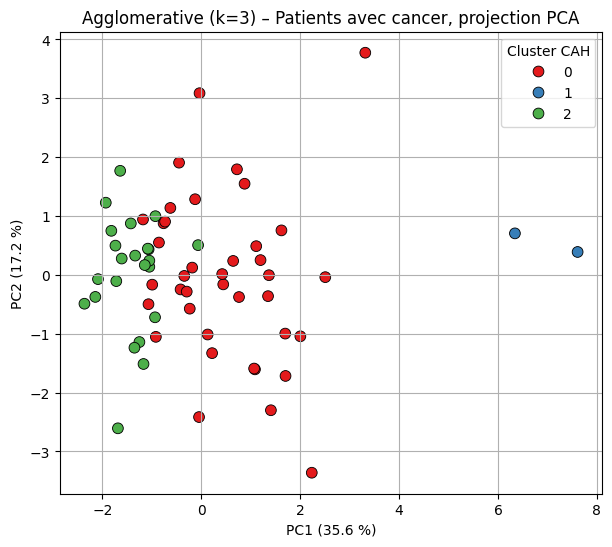

In [243]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# On part de X_cancer_scaled (patients avec cancer, standardisées)
pca_agg = PCA(n_components=2)
X_cancer_pca_agg = pca_agg.fit_transform(X_cancer_scaled)

# Ajouter les composantes au df_cancer
df_cancer["PC1_agg"] = X_cancer_pca_agg[:, 0]
df_cancer["PC2_agg"] = X_cancer_pca_agg[:, 1]

plt.figure(figsize=(7, 6))
sns.scatterplot(
    data=df_cancer,
    x="PC1_agg", y="PC2_agg",
    hue="cluster_agg_3",        # labels CAH (0 et 1)
    palette="Set1",
    s=60,
    edgecolor="k"
)
plt.xlabel(f"PC1 ({pca_agg.explained_variance_ratio_[0]*100:.1f} %)")
plt.ylabel(f"PC2 ({pca_agg.explained_variance_ratio_[1]*100:.1f} %)")
plt.title("Agglomerative (k=3) – Patients avec cancer, projection PCA")
plt.legend(title="Cluster CAH")
plt.grid(True)
plt.show()


## **Modèle 3 (GMM)**


GMM k=2: silhouette=0.258
GMM k=3: silhouette=0.168
GMM k=4: silhouette=0.152


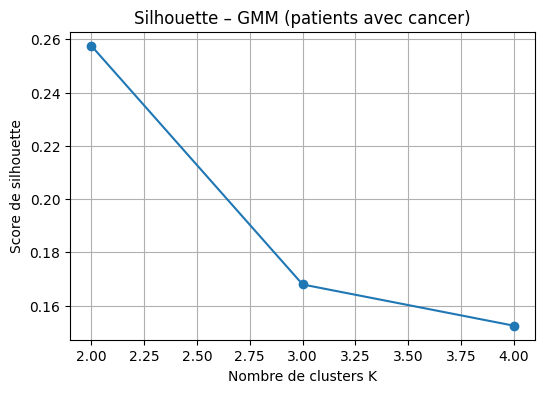

In [244]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Tester k = 2, 3, 4
K_range = range(2, 5)
sil_scores_gmm = []

for k in K_range:
    gmm = GaussianMixture(
        n_components=k,
        covariance_type="full",
        random_state=42
    )
    gmm.fit(X_cancer_scaled)

    labels = gmm.predict(X_cancer_scaled)
    sil = silhouette_score(X_cancer_scaled, labels)
    sil_scores_gmm.append(sil)

    print(f"GMM k={k}: silhouette={sil:.3f}")

# Graphique silhouette
plt.figure(figsize=(6, 4))
plt.plot(K_range, sil_scores_gmm, marker='o')
plt.xlabel("Nombre de clusters K")
plt.ylabel("Score de silhouette")
plt.title("Silhouette – GMM (patients avec cancer)")
plt.grid(True)
plt.show()


In [245]:
import numpy as np

# Choisir le meilleur k
best_k_gmm = 3   # (ou le meilleur selon silhouette)

gmm_final = GaussianMixture(
    n_components=best_k_gmm,
    covariance_type="full",
    random_state=42
)
gmm_final.fit(X_cancer_scaled)

# Labels clusters
labels_gmm = gmm_final.predict(X_cancer_scaled)

# Ajouter au df_cancer
df_cancer["cluster_gmm"] = labels_gmm

# Intégrer dans df complet
df["cluster_gmm"] = np.nan
df.loc[df_cancer.index, "cluster_gmm"] = labels_gmm

# Qualité du clustering
sil_gmm = silhouette_score(X_cancer_scaled, labels_gmm)
print("Silhouette GMM :", sil_gmm)

# Nombre de patientes par cluster
print(df_cancer["cluster_gmm"].value_counts())

# Profil moyen des clusters
cluster_profile_gmm = df_cancer.groupby("cluster_gmm")[features].mean()
print(cluster_profile_gmm)


Silhouette GMM : 0.16794200374270676
cluster_gmm
0    38
1    16
2    10
Name: count, dtype: int64
                   Age        BMI     Glucose    Insulin      HOMA     Leptin  \
cluster_gmm                                                                     
0            55.236842  26.287609   94.736842   7.391053  1.739184  21.215153   
1            63.625000  31.181117  136.812500  22.157187  7.840632  46.906756   
2            51.000000  22.919637   96.700000  16.547100  4.035479  14.549290   

             Adiponectin   Resistin       MCP.1  
cluster_gmm                                      
0               7.739978  18.645044  585.524711  
1               9.527198  19.263164  659.854625  
2              19.736037   8.751942  322.544300  


In [246]:
df_cancer.head(50)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,cluster_kmeans_cancer,PC1,PC2,cluster_kmeans_cancer_3,PC1_3,PC2_3,cluster_agg_3,PC1_agg,PC2_agg,cluster_gmm
52,45,21.303949,102,13.852,3.485163,7.6476,21.056625,23.03408,552.444,2,0,-1.050763,0.137829,0,-1.050763,0.137829,2,-1.050763,0.137829,2
53,45,20.829995,74,4.560,0.832352,7.7529,8.237405,28.03230,382.955,2,0,-1.931268,1.226793,0,-1.931268,1.226793,2,-1.931268,1.226793,0
54,49,20.956608,94,12.305,2.853119,11.2406,8.412175,23.11770,573.630,2,0,-0.927665,0.997197,0,-0.927665,0.997197,2,-0.927665,0.997197,0
55,34,24.242424,92,21.699,4.924226,16.7353,21.823745,12.06534,481.949,2,0,-0.935356,-0.720615,0,-0.935356,-0.720615,2,-0.935356,-0.720615,2
56,42,21.359915,93,2.999,0.687971,19.0826,8.462915,17.37615,321.919,2,0,-1.735671,0.496970,0,-1.735671,0.496970,2,-1.735671,0.496970,0
57,68,21.082813,102,6.200,1.559920,9.6994,8.574655,13.74244,448.799,2,0,-1.050433,0.241925,0,-1.050433,0.241925,2,-1.050433,0.241925,0
58,51,19.132653,93,4.364,1.001102,11.0816,5.807620,5.57055,90.600,2,0,-2.088691,-0.071911,0,-2.088691,-0.071911,2,-2.088691,-0.071911,0
59,62,22.656250,92,3.482,0.790182,9.8648,11.236235,10.69548,703.973,2,0,-1.337004,0.327515,0,-1.337004,0.327515,2,-1.337004,0.327515,0
60,38,22.499637,95,5.261,1.232828,8.4380,4.771920,15.73606,199.055,2,0,-1.819040,0.748879,0,-1.819040,0.748879,2,-1.819040,0.748879,0
61,69,21.513859,112,6.683,1.846290,32.5800,4.138025,15.69876,713.239,2,0,-0.064542,0.505418,0,-0.064542,0.505418,2,-0.064542,0.505418,0


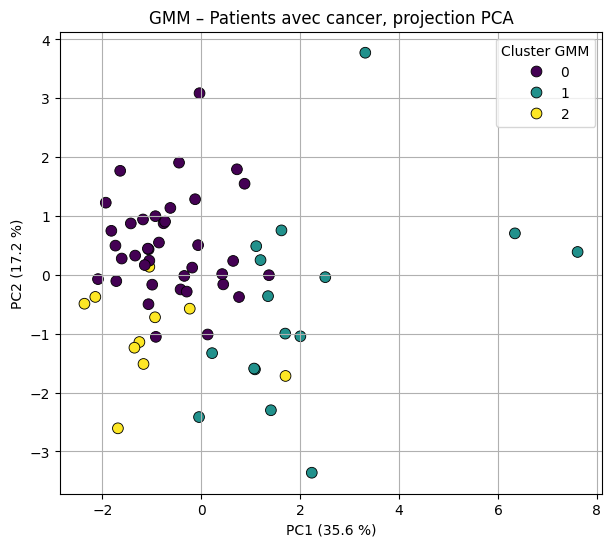

In [247]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# PCA 2D
pca_gmm = PCA(n_components=2)
X_cancer_pca_gmm = pca_gmm.fit_transform(X_cancer_scaled)

df_cancer["PC1_gmm"] = X_cancer_pca_gmm[:, 0]
df_cancer["PC2_gmm"] = X_cancer_pca_gmm[:, 1]

# Scatterplot
plt.figure(figsize=(7, 6))
sns.scatterplot(
    data=df_cancer,
    x="PC1_gmm",
    y="PC2_gmm",
    hue="cluster_gmm",
    palette="viridis",
    s=60,
    edgecolor="k"
)
plt.xlabel(f"PC1 ({pca_gmm.explained_variance_ratio_[0]*100:.1f} %)")
plt.ylabel(f"PC2 ({pca_gmm.explained_variance_ratio_[1]*100:.1f} %)")
plt.title("GMM – Patients avec cancer, projection PCA")
plt.legend(title="Cluster GMM")
plt.grid(True)
plt.show()


In [252]:
cols_to_drop = ["PC1", "PC2", "PC1_3", "PC2_3", "PC1_agg", "PC2_agg", "PC1_gmm","PC2_gmm"]
df_cancer = df_cancer.drop(columns=cols_to_drop, errors="ignore")


In [253]:
df_cancer.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,cluster_kmeans_cancer,cluster_kmeans_cancer_3,cluster_agg_3,cluster_gmm
52,45,21.303949,102,13.852,3.485163,7.6476,21.056625,23.03408,552.444,2,0,0,2,2
53,45,20.829995,74,4.560,0.832352,7.7529,8.237405,28.03230,382.955,2,0,0,2,0
54,49,20.956608,94,12.305,2.853119,11.2406,8.412175,23.11770,573.630,2,0,0,2,0
55,34,24.242424,92,21.699,4.924226,16.7353,21.823745,12.06534,481.949,2,0,0,2,2
56,42,21.359915,93,2.999,0.687971,19.0826,8.462915,17.37615,321.919,2,0,0,2,0


In [254]:
#attribuer le cluster au non malade
df_non_cancer["cluster_kmeans_cancer"] = 3
df_non_cancer["cluster_kmeans_cancer_3"] = 3
df_non_cancer["cluster_agg_3"] = 3
df_non_cancer["cluster_gmm"] = 3

In [255]:
df_non_cancer.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,cluster_kmeans_cancer,cluster_kmeans_cancer_3,cluster_agg_3,cluster_gmm
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1,3,3,3,3
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1,3,3,3,3
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1,3,3,3,3
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1,3,3,3,3
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1,3,3,3,3


In [256]:
#fusionner les dfs
df_complet = pd.concat([df_cancer, df_non_cancer], axis=0)
df_complet = df_complet.sort_index()


In [259]:
print(df_complet["cluster_kmeans_cancer"].value_counts())
print(df_complet["cluster_kmeans_cancer_3"].value_counts())
print(df_complet["cluster_agg_3"].value_counts())
print(df_complet["cluster_gmm"].value_counts())


cluster_kmeans_cancer
3    52
0    40
1    24
Name: count, dtype: int64
cluster_kmeans_cancer_3
3    52
0    39
1    22
2     3
Name: count, dtype: int64
cluster_agg_3
3    52
0    39
2    23
1     2
Name: count, dtype: int64
cluster_gmm
3    52
0    38
1    16
2    10
Name: count, dtype: int64


# **V. Evaluation**

In [265]:
from sklearn.metrics import (
    silhouette_score, davies_bouldin_score, calinski_harabasz_score,
    adjusted_rand_score, normalized_mutual_info_score,
    homogeneity_score, completeness_score, v_measure_score
)

def evaluate_clustering(X, labels):
    results = {}

    # Internal metrics
    results["silhouette"] = silhouette_score(X, labels)
    results["davies_bouldin"] = davies_bouldin_score(X, labels)
    results["calinski_harabasz"] = calinski_harabasz_score(X, labels)


    return results


In [266]:
results_kmeans_3 = evaluate_clustering(
    X_cancer_scaled,
    df_cancer["cluster_kmeans_cancer_3"]
)
print("Évaluation KMeans k=3 :")
print(results_kmeans_3)


Évaluation KMeans k=3 :
{'silhouette': np.float64(0.21868320395349716), 'davies_bouldin': np.float64(1.536041600853445), 'calinski_harabasz': np.float64(17.5139969952865)}


In [267]:
results_agg = evaluate_clustering(
    X_cancer_scaled,
    df_cancer["cluster_agg_3"]
)
print("Évaluation Agglomératif :")
print(results_agg)


Évaluation Agglomératif :
{'silhouette': np.float64(0.16333552353660807), 'davies_bouldin': np.float64(1.4241494410103923), 'calinski_harabasz': np.float64(15.335836102104611)}


In [268]:
results_gmm = evaluate_clustering(
    X_cancer_scaled,
    df_cancer["cluster_gmm"]
)
print("Évaluation GMM :")
print(results_gmm)


Évaluation GMM :
{'silhouette': np.float64(0.16794200374270676), 'davies_bouldin': np.float64(1.6872830445113796), 'calinski_harabasz': np.float64(12.035539400172546)}


# **VI. Deployment**